In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [3]:
listings = pd.read_csv('Exercise Files/ChickWeight.csv')

In [5]:
list(listings.columns)

['Unnamed: 0', 'weight', 'Time', 'Chick', 'Diet']

In [9]:
diet_1 = listings.loc[listings['Diet'] == 1, 'weight']
diet_2 = listings.loc[listings['Diet'] == 2, 'weight']

In [10]:
diet_1

0       42
1       51
2       59
3       64
4       76
      ... 
215     89
216     98
217    107
218    115
219    117
Name: weight, Length: 220, dtype: int64

In [11]:
np.random.choice(diet_1, size = len(diet_1))

array([215,  54, 192,  73, 182,  42, 138, 103,  76, 123, 174, 199, 202,
       102,  73, 117, 164,  71, 174,  45, 135,  74,  65,  51, 154, 113,
        71,  92,  50,  63,  67, 205, 119,  88, 157, 199,  41,  97,  71,
        42,  63,  71, 142,  81,  88, 162,  73,  49,  96,  59,  91,  42,
       164,  67, 209, 160,  49,  72,  79,  47, 119, 144,  88,  84, 160,
        51,  41,  59, 259, 112, 164,  71, 135,  41,  55,  43, 144,  41,
       101, 187, 192, 248, 160,  88,  62,  76,  42,  43, 125, 248,  98,
        43,  60, 199,  48, 288, 164,  68, 205,  71, 148, 163, 120,  68,
       117,  59, 175,  65,  74, 160,  90, 177,  48,  70, 125, 113, 100,
        63,  44, 202,  79, 149, 120,  41, 141,  53, 177,  65,  67, 101,
        71, 184,  74,  41, 187, 187, 184,  45, 120, 192, 103,  68,  71,
        47,  58,  64, 125, 162, 115,  98,  74,  41,  42,  54, 174,  84,
        42, 101,  65,  41,  42,  93, 148,  65, 144,  48,  84, 250,  96,
       144, 157,  53,  84,  52, 198,  84,  42,  72,  88,  51, 14

In [12]:
np.random.choice(diet_2, size = len(diet_2))

array([185,  58, 144,  85, 156, 187,  42, 233, 279,  39, 115, 124,  90,
       114,  73,  40, 164, 163,  62,  62,  66,  98, 127, 150,  52, 170,
       148,  86,  87,  68,  74, 309,  74,  59, 115,  41, 157, 145, 275,
        58,  78,  50,  46, 185,  62,  57,  74, 279,  55,  72, 207, 125,
       135, 111, 131, 125, 115, 150, 169,  48, 164, 307, 279, 144, 331,
       169,  72,  86,  52, 156,  73,  86, 125, 307,  49, 146, 187,  59,
       150,  58, 123, 212, 205, 124, 307, 102, 164,  85,  85, 231, 184,
        92, 197,  85,  46,  58,  58,  76,  46, 114, 307, 100, 145,  76,
       151,  68, 108, 134, 307, 124, 240, 187, 212,  39, 146,  68, 156,
       169, 309,  86])

In [13]:
def resample(orig_sample):
    return np.random.choice(orig_sample, size = len(orig_sample))

In [14]:
def bootstrap(orig_sample, reps):
    means = np.array([])
    
    for i in range(reps):
        new_sample = resample(orig_sample)
        
        new_mean = np.mean(new_sample)
        
        means = np.append(means, new_mean)
        
    return means

In [16]:
diet_1_means = bootstrap(diet_1, 10000)

diet_2_means = bootstrap(diet_2, 10000)

estimates = diet_1_means - diet_2_means

In [17]:
estimates

array([-16.20606061, -14.15      , -27.14469697, ..., -22.80075758,
       -31.71893939, -12.30606061])

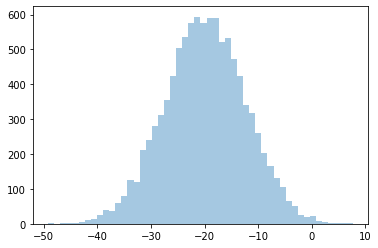

In [19]:
sn.distplot(estimates, kde = False)
plt.show()

In [21]:
(np.percentile(estimates, 2.5), np .percentile(estimates, 97.5))

(-34.805871212121204, -5.3544886363636275)